In [ ]:
"""get all players who qualified for league leaders the last 2 years"""
from nba_api.stats.endpoints import leagueleaders
league_leaders = leagueleaders.LeagueLeaders(per_mode48='PerGame', season='2022-23').get_data_frames()[0]
scorers_2223 = league_leaders[['PLAYER_ID','RANK','PLAYER','TEAM_ID','GP', 'MIN', 'PTS']]
from nba_api.stats.endpoints import leagueleaders
league_leaders = leagueleaders.LeagueLeaders(per_mode48='PerGame', season='2023-24').get_data_frames()[0]
scorers_2324 = league_leaders[['PLAYER_ID','RANK','PLAYER','TEAM_ID','GP', 'MIN', 'PTS']]

In [ ]:
"""loop to get ID, name, ppg, std, cv for each scorer in a dict"""
#this is likely to fail without sleeps. Probably less would work (although maybe higher than 30), but I know time.sleep(45) works and i did 50 indexes at a time

scorers_dict_2223 = {}
from nba_api.stats.endpoints import playergamelog
for scorer in scorers_2223.index:
    id = scorers_2223.loc[scorer, 'PLAYER_ID'].item()
    name = scorers_2223.loc[scorer, 'PLAYER']
    gamelog = playergamelog.PlayerGameLog(player_id=id, season='2022-23').get_data_frames()[0]
    ppg = gamelog['PTS'].mean()
    std = gamelog['PTS'].std()
    cv = std/ppg

    scorers_dict_2223.update({f"{name}": [id, ppg, std, cv]})
del(cv, id, name, gamelog, ppg, scorer, std)

#import time (when api-limited, time.sleep(45) works and I did 50 indexes at a time (currently set to the final set of indexes)
scorers_dict_2324 = {}
from nba_api.stats.endpoints import playergamelog
for scorer in scorers_2324.index[200:240]:
    id = scorers_2324.loc[scorer, 'PLAYER_ID'].item()
    name = scorers_2324.loc[scorer, 'PLAYER']
    gamelog = playergamelog.PlayerGameLog(player_id=id, season='2023-24').get_data_frames()[0]
    ppg = gamelog['PTS'].mean()
    std = gamelog['PTS'].std()
    cv = std/ppg
    #time.sleep(45)

    scorers_dict_2324.update({f"{name}": [id, ppg, std, cv]})
del(cv, id, name, gamelog, ppg, scorer, std)

In [ ]:
"""turn the dicts into dfs"""
import pandas as pd
headers = ['name', 'player_id', 'ppg', 'std', 'cv']
scorers_summary_2223 = pd.DataFrame([[k] + v for k,v in scorers_dict_2223.items()], columns=headers)
scorers_summary_2223['year'] = '2022-23'

scorers_summary_2324 = pd.DataFrame([[k] + v for k,v in scorers_dict_2324.items()], columns=headers)
scorers_summary_2324['year'] = '2023-24'

"combine the dfs into one"
scorers_summary = pd.concat([scorers_summary_2223, scorers_summary_2324]).reset_index(drop=True)
del(headers, league_leaders, scorers_2223, scorers_2324, scorers_dict_2223, scorers_dict_2324, scorers_summary_2223, scorers_summary_2324)

In [9]:
"""ONLY FOR JUPYTER - did all of the above in console, here will upload the resulting table"""
import pandas as pd
scorers_summary = pd.read_csv('scorers_summary.csv', index_col=0)

In [16]:
round(scorers_summary.sort_values(by=['ppg'], ascending=False), 2).head(10)

,name,player_id,ppg,std,cv,year
245,Luka Doncic,1629029,33.86,8.81,0.26,2023-24
0,Joel Embiid,203954,33.08,8.85,0.27,2022-23
1,Luka Doncic,1629029,32.39,9.76,0.30,2022-23
2,Damian Lillard,203081,32.17,10.59,0.33,2022-23
3,Shai Gilgeous-Alexander,1628983,31.40,6.73,0.21,2022-23
4,Giannis Antetokounmpo,203507,31.10,10.74,0.35,2022-23
246,Giannis Antetokounmpo,203507,30.44,9.12,0.30,2023-24
5,Jayson Tatum,1628369,30.07,8.48,0.28,2022-23
247,Shai Gilgeous-Alexander,1628983,30.05,6.97,0.23,2023-24
248,Jalen Brunson,1628973,28.73,10.12,0.35,2023-24


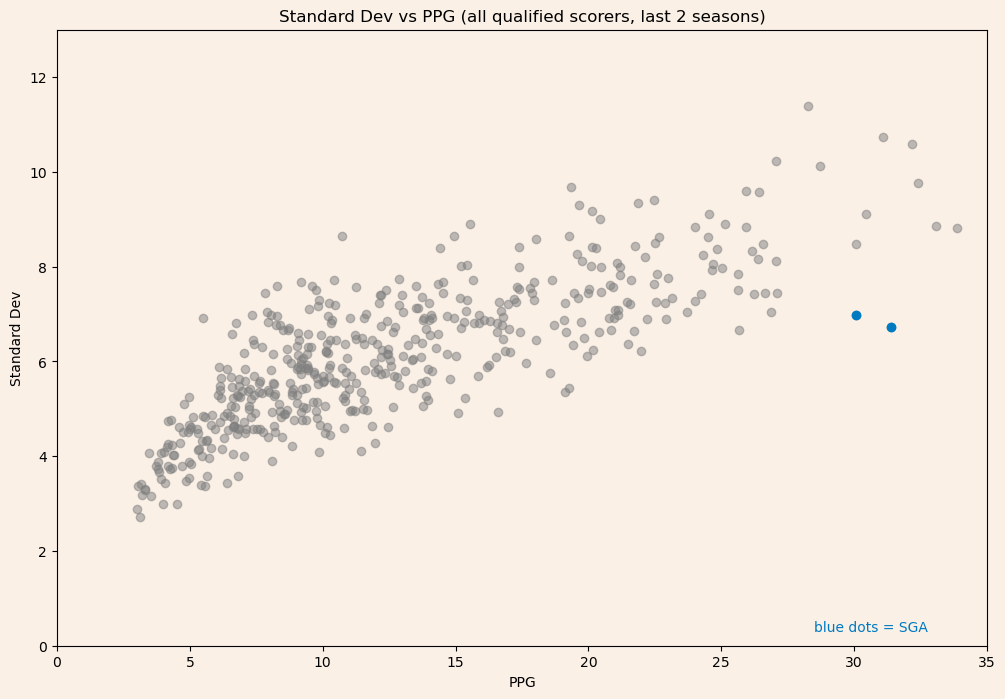

In [37]:
"""scatterplots"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8), dpi= 100, facecolor=('linen'))
ax.set_facecolor('linen')

plt.scatter(x='ppg', y='std', data=scorers_summary, color='grey', alpha=.5)

plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['ppg'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['std'].item(),
            data=scorers_summary, color='#007AC1')

plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['ppg'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['std'].item(),
            data=scorers_summary, color='#007AC1')

plt.annotate("blue dots = SGA", xy=(scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['ppg'].item(),
                        scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['std'].item()),
             xytext=(28.5,.3),
             color='#007AC1', fontsize=10)

plt.xlim(0,35)
plt.ylim(0,13)
plt.xlabel("PPG")
plt.ylabel("Standard Dev")
plt.title("Standard Dev vs PPG (all qualified scorers, last 2 seasons)")
plt.show()

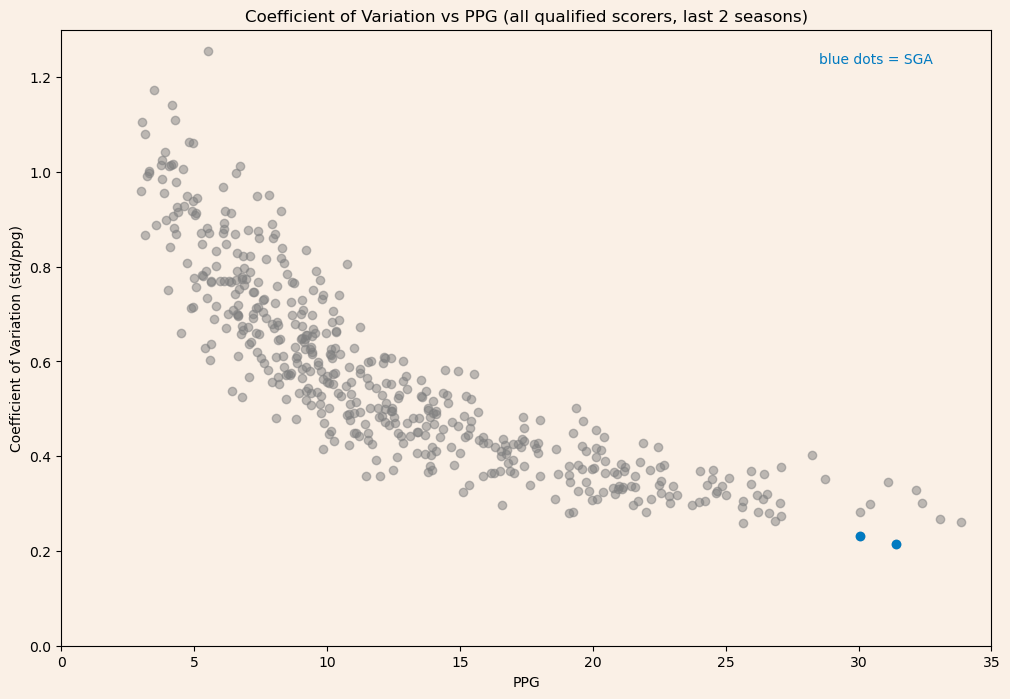

In [39]:
"""scatterplots"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8), dpi= 100, facecolor=('linen'))
ax.set_facecolor('linen')

plt.scatter(x='ppg', y='cv', data=scorers_summary, color='grey', alpha=.5)

plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['ppg'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['cv'].item(),
            data=scorers_summary, color='#007AC1')

plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['ppg'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['cv'].item(),
            data=scorers_summary, color='#007AC1')

plt.annotate("blue dots = SGA", xy=(28.5, 1.3),
             xytext=(28.5,1.23),
             color='#007AC1', fontsize=10)

plt.xlim(0,35)
plt.ylim(0,1.3)
plt.xlabel("PPG")
plt.ylabel("Coefficient of Variation (std/ppg)")
plt.title("Coefficient of Variation vs PPG (all qualified scorers, last 2 seasons)")
plt.show()

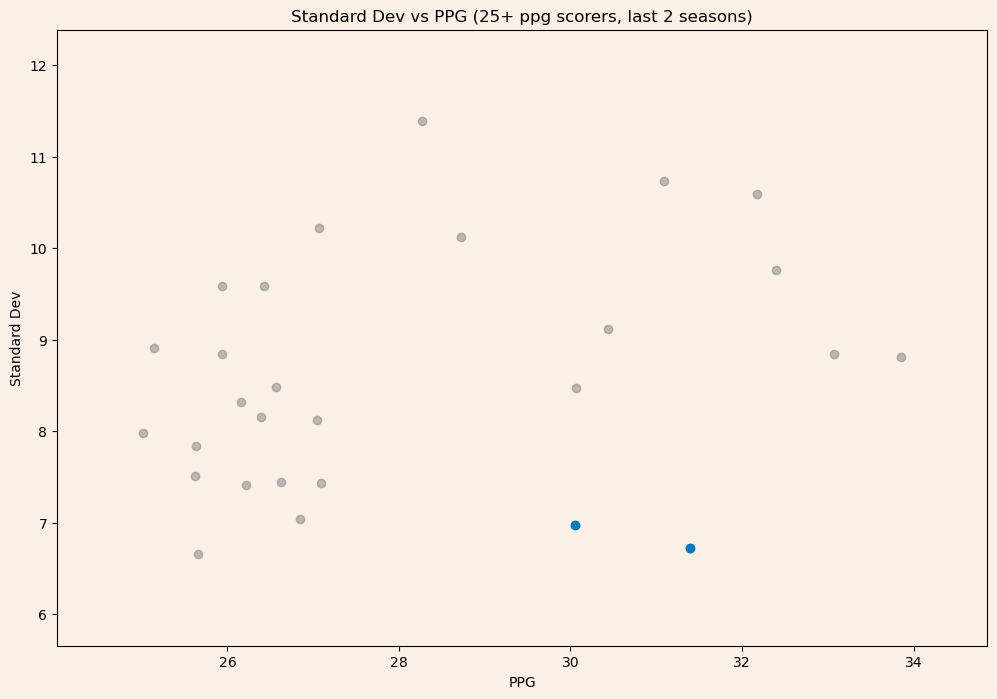

In [43]:
"""scatterplots"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8), dpi= 100, facecolor=('linen'))
ax.set_facecolor('linen')

plt.scatter(x='ppg', y='std', data=scorers_summary[scorers_summary['ppg'] > 25], color='grey', alpha=.5)

plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['ppg'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['std'].item(),
            data=scorers_summary, color='#007AC1')

plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['ppg'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['std'].item(),
            data=scorers_summary, color='#007AC1')

plt.xlim(scorers_summary[scorers_summary['ppg'] > 25]['ppg'].min() - 1, scorers_summary[scorers_summary['ppg'] > 25]['ppg'].max() + 1)
plt.ylim(scorers_summary[scorers_summary['ppg'] > 25]['std'].min() - 1, scorers_summary[scorers_summary['ppg'] > 25]['std'].max() + 1)
plt.xlabel("PPG")
plt.ylabel("Standard Dev")
plt.title("Standard Dev vs PPG (25+ ppg scorers, last 2 seasons)")
plt.show()

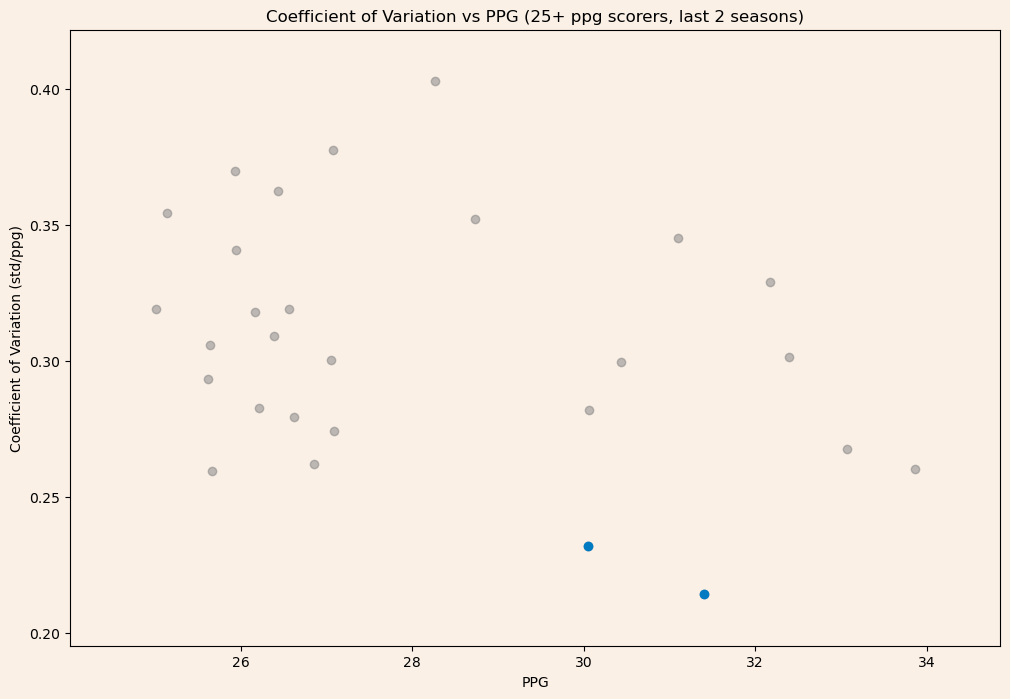

In [45]:
"""scatterplots"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8), dpi= 100, facecolor=('linen'))
ax.set_facecolor('linen')

plt.scatter(x='ppg', y='cv', data=scorers_summary[scorers_summary['ppg'] > 25], color='grey', alpha=.5)

plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['ppg'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2022-23')]['cv'].item(),
            data=scorers_summary, color='#007AC1')

plt.scatter(x=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['ppg'].item(),
            y=scorers_summary[(scorers_summary['name'] == 'Shai Gilgeous-Alexander') & (scorers_summary['year'] == '2023-24')]['cv'].item(),
            data=scorers_summary, color='#007AC1')

plt.xlim(scorers_summary[scorers_summary['ppg'] > 25]['ppg'].min() - 1, scorers_summary[scorers_summary['ppg'] > 25]['ppg'].max() + 1)
plt.ylim(scorers_summary[scorers_summary['ppg'] > 25]['cv'].min() - ((scorers_summary[scorers_summary['ppg'] > 25]['cv'].max() - scorers_summary[scorers_summary['ppg'] > 25]['cv'].min()) * .1),
         scorers_summary[scorers_summary['ppg'] > 25]['cv'].max() + ((scorers_summary[scorers_summary['ppg'] > 25]['cv'].max() - scorers_summary[scorers_summary['ppg'] > 25]['cv'].min()) * .1))
plt.xlabel("PPG")
plt.ylabel("Coefficient of Variation (std/ppg)")
plt.title("Coefficient of Variation vs PPG (25+ ppg scorers, last 2 seasons)")
plt.show()

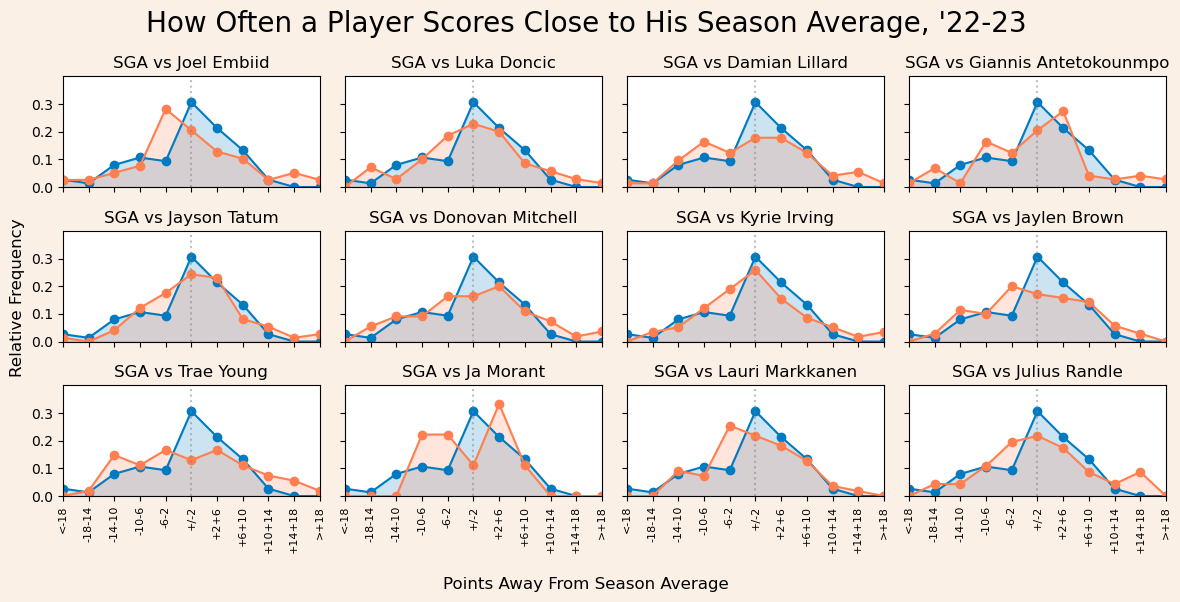

In [53]:
"""gamelog distributions for 2022-23"""

"""get top 13 (12 + Shai) qualified scorers from 2022-23"""
topscorers_2223 = scorers_summary[scorers_summary['year'] == '2022-23'].sort_values(by=['ppg'], ascending=False)[0:13]


"""get info for Shai's distribution and calc pts off average"""
shai_ID = topscorers_2223[topscorers_2223['name'] == 'Shai Gilgeous-Alexander']['player_id'].item()
from nba_api.stats.endpoints import playergamelog
shai_log = playergamelog.PlayerGameLog(player_id=shai_ID).get_data_frames()[0]
shai_avg = shai_log['PTS'].mean()
shai_log['PTS_diff'] = shai_log['PTS'] - shai_avg


"""instead of the more logical bar plot, trying a line plot with bins of 4 pts"""
import numpy as np
conditions = [
    (shai_log['PTS_diff'].between(-100,-18)),
    (shai_log['PTS_diff'].between(-18,-14)),
    (shai_log['PTS_diff'].between(-14,-10)),
    (shai_log['PTS_diff'].between(-10,-6)),
    (shai_log['PTS_diff'].between(-6,-2)),
    (shai_log['PTS_diff'].between(-2,2)),
    (shai_log['PTS_diff'].between(2,6)),
    (shai_log['PTS_diff'].between(6,10)),
    (shai_log['PTS_diff'].between(10,14)),
    (shai_log['PTS_diff'].between(14,18)),
    (shai_log['PTS_diff'].between(18,100))
]
choices = ['<-18', '-18-14', '-14-10', '-10-6', '-6-2', '+/-2', '+2+6', '+6+10', '+10+14', '+14+18', '>+18']
shai_log['diff_bin'] = np.select(conditions, choices, default='ERROR')

# count the results of each bin
shai_dict = shai_log['diff_bin'].value_counts(normalize=True).sort_values().to_dict()

# sort the results of the bin using comprehension (if key is in dict)
shai_keys = [key for key in choices]
shai_values = [shai_dict.get(key, 0) for key in shai_keys]

"""grid of 12 images, comparing each of the other top scorers to shai's distribution in a loop"""
fig, axs = plt.subplots(3, 4, figsize=(12, 6), sharex=True, sharey=True, facecolor=('linen'))

ids_list = list(topscorers_2223.loc[topscorers_2223[topscorers_2223['name'] != 'Shai Gilgeous-Alexander'].index, 'player_id'])

for i, ax in enumerate(axs.flatten()):
    player_ID = ids_list[i]
    player_name = topscorers_2223[topscorers_2223['player_id'] == player_ID]['name'].item()
    from nba_api.stats.endpoints import playergamelog

    player_log = playergamelog.PlayerGameLog(player_id=player_ID).get_data_frames()[0]
    player_avg = player_log['PTS'].mean()

    player_log['PTS_diff'] = player_log['PTS'] - player_avg

    import numpy as np

    conditions = [
        (player_log['PTS_diff'].between(-100, -18)),
        (player_log['PTS_diff'].between(-18, -14)),
        (player_log['PTS_diff'].between(-14, -10)),
        (player_log['PTS_diff'].between(-10, -6)),
        (player_log['PTS_diff'].between(-6, -2)),
        (player_log['PTS_diff'].between(-2, 2)),
        (player_log['PTS_diff'].between(2, 6)),
        (player_log['PTS_diff'].between(6, 10)),
        (player_log['PTS_diff'].between(10, 14)),
        (player_log['PTS_diff'].between(14, 18)),
        (player_log['PTS_diff'].between(18, 100))
    ]
    choices = ['<-18', '-18-14', '-14-10', '-10-6', '-6-2', '+/-2', '+2+6', '+6+10', '+10+14', '+14+18', '>+18']
    player_log['diff_bin'] = np.select(conditions, choices, default='ERROR')

    # count the results of each bin
    player_dict = player_log['diff_bin'].value_counts(normalize=True).sort_values().to_dict()

    # sort the results of the bin using comprehension (if key is in dict)
    sorted_keys = [key for key in choices]
    sorted_values = [player_dict.get(key, 0) for key in sorted_keys]

    import matplotlib.pyplot as plt

    ax.plot(shai_keys, shai_values, color='#007AC1', marker='o')
    ax.fill_between(x=shai_keys, y1=0, y2=shai_values, color='#007AC1', alpha=.2)
    ax.plot(sorted_keys, sorted_values, color='#FF7F50', marker='o')
    ax.fill_between(x=sorted_keys, y1=0, y2=sorted_values, color='#FF7F50', alpha=.2)
    ax.axvline(x='+/-2', color='grey', linestyle='dotted', alpha=.5)
    # could maybe use this for ylim below max(max(sorted_values), max(sorted_values)) + .1
    ax.set_ylim(0, .4)
    ax.set_xlim('<-18', '>+18')
    ax.set_title(f"SGA vs {player_name}")

for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks([0, .1, .2, .3])

# fig.xlabel("Points away from season PPG")
# fig.ylabel("Relative Frequency")

fig.supxlabel('Points Away From Season Average')
fig.supylabel('Relative Frequency')
fig.suptitle("How Often a Player Scores Close to His Season Average, '22-23", fontsize=20)
plt.tight_layout()
plt.show()

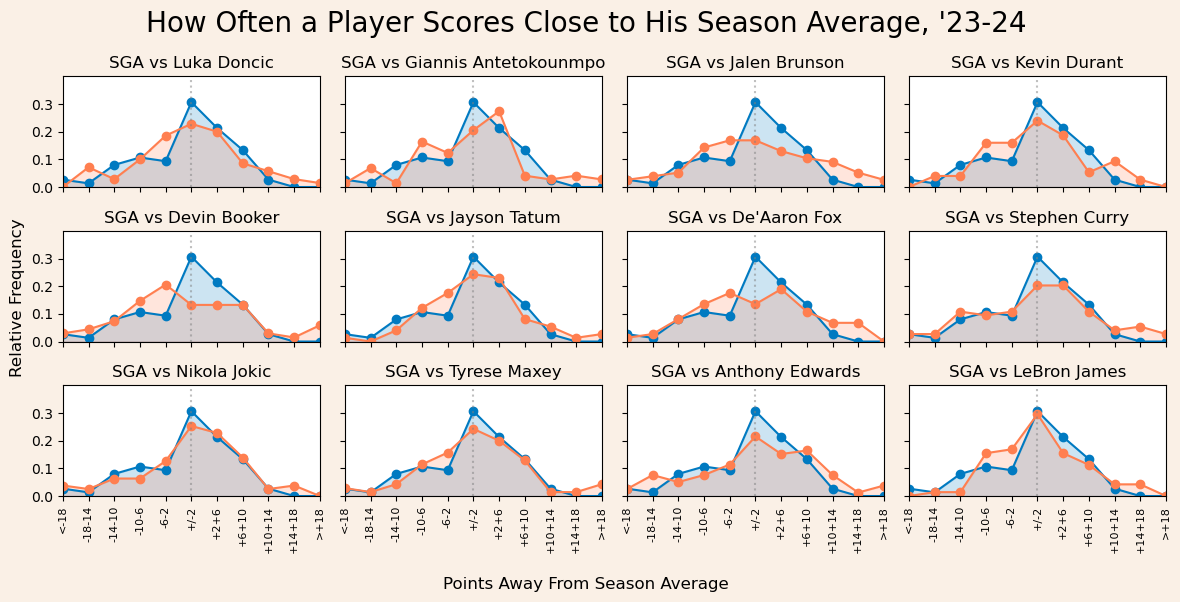

In [55]:
"""gamelog distributions for 2023-24"""

"""get top 13 (12 + Shai) qualified scorers from 2023-24"""
topscorers_2324 = scorers_summary[scorers_summary['year'] == '2023-24'].sort_values(by=['ppg'], ascending=False)[0:13]


"""get info for Shai's distribution and calc pts off average"""
shai_ID = topscorers_2324[topscorers_2324['name'] == 'Shai Gilgeous-Alexander']['player_id'].item()
from nba_api.stats.endpoints import playergamelog
shai_log = playergamelog.PlayerGameLog(player_id=shai_ID).get_data_frames()[0]
shai_avg = shai_log['PTS'].mean()
shai_log['PTS_diff'] = shai_log['PTS'] - shai_avg


"""instead of the more logical bar plot, trying a line plot with bins of 4 pts for Shai's distribution vs each of the other 12 leading scorers"""
import numpy as np
conditions = [
    (shai_log['PTS_diff'].between(-100,-18)),
    (shai_log['PTS_diff'].between(-18,-14)),
    (shai_log['PTS_diff'].between(-14,-10)),
    (shai_log['PTS_diff'].between(-10,-6)),
    (shai_log['PTS_diff'].between(-6,-2)),
    (shai_log['PTS_diff'].between(-2,2)),
    (shai_log['PTS_diff'].between(2,6)),
    (shai_log['PTS_diff'].between(6,10)),
    (shai_log['PTS_diff'].between(10,14)),
    (shai_log['PTS_diff'].between(14,18)),
    (shai_log['PTS_diff'].between(18,100))
]
choices = ['<-18', '-18-14', '-14-10', '-10-6', '-6-2', '+/-2', '+2+6', '+6+10', '+10+14', '+14+18', '>+18']
shai_log['diff_bin'] = np.select(conditions, choices, default='ERROR')

# count the results of each bin
shai_dict = shai_log['diff_bin'].value_counts(normalize=True).sort_values().to_dict()

# sort the results of the bin using comprehension (if key is in dict)
shai_keys = [key for key in choices]
shai_values = [shai_dict.get(key, 0) for key in shai_keys]

"""grid of 12 images, comparing each of the other top scorers to shai's distribution in a loop"""
fig, axs = plt.subplots(3, 4, figsize=(12, 6), sharex=True, sharey=True, facecolor=('linen'))

ids_list = list(topscorers_2324.loc[topscorers_2324[topscorers_2324['name'] != 'Shai Gilgeous-Alexander'].index, 'player_id'])

for i, ax in enumerate(axs.flatten()):
    player_ID = ids_list[i]
    player_name = topscorers_2324[topscorers_2324['player_id'] == player_ID]['name'].item()
    from nba_api.stats.endpoints import playergamelog

    player_log = playergamelog.PlayerGameLog(player_id=player_ID).get_data_frames()[0]
    player_avg = player_log['PTS'].mean()

    player_log['PTS_diff'] = player_log['PTS'] - player_avg

    import numpy as np

    conditions = [
        (player_log['PTS_diff'].between(-100, -18)),
        (player_log['PTS_diff'].between(-18, -14)),
        (player_log['PTS_diff'].between(-14, -10)),
        (player_log['PTS_diff'].between(-10, -6)),
        (player_log['PTS_diff'].between(-6, -2)),
        (player_log['PTS_diff'].between(-2, 2)),
        (player_log['PTS_diff'].between(2, 6)),
        (player_log['PTS_diff'].between(6, 10)),
        (player_log['PTS_diff'].between(10, 14)),
        (player_log['PTS_diff'].between(14, 18)),
        (player_log['PTS_diff'].between(18, 100))
    ]
    choices = ['<-18', '-18-14', '-14-10', '-10-6', '-6-2', '+/-2', '+2+6', '+6+10', '+10+14', '+14+18', '>+18']
    player_log['diff_bin'] = np.select(conditions, choices, default='ERROR')

    # count the results of each bin
    player_dict = player_log['diff_bin'].value_counts(normalize=True).sort_values().to_dict()

    # sort the results of the bin using comprehension (if key is in dict)
    sorted_keys = [key for key in choices]
    sorted_values = [player_dict.get(key, 0) for key in sorted_keys]

    import matplotlib.pyplot as plt

    ax.plot(shai_keys, shai_values, color='#007AC1', marker='o')
    ax.fill_between(x=shai_keys, y1=0, y2=shai_values, color='#007AC1', alpha=.2)
    ax.plot(sorted_keys, sorted_values, color='#FF7F50', marker='o')
    ax.fill_between(x=sorted_keys, y1=0, y2=sorted_values, color='#FF7F50', alpha=.2)
    ax.axvline(x='+/-2', color='grey', linestyle='dotted', alpha=.5)
    # could maybe use this for ylim below max(max(sorted_values), max(sorted_values)) + .1
    ax.set_ylim(0, .4)
    ax.set_xlim('<-18', '>+18')
    ax.set_title(f"SGA vs {player_name}")

for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks([0, .1, .2, .3])

# fig.xlabel("Points away from season PPG")
# fig.ylabel("Relative Frequency")

fig.supxlabel('Points Away From Season Average')
fig.supylabel('Relative Frequency')
fig.suptitle("How Often a Player Scores Close to His Season Average, '23-24", fontsize=20)
plt.tight_layout()
plt.show()

It seems clear that Shai's PPG consistency is basically unmatched among the league's highest scorers. The scatterplots are clear, and the distributions are universally in Shai's favor, being centered in the middle more in Shai's case than in any other (with the possible exception of '23-24 LeBron, discussed later). 

Shai's status as the most consistent scorer by PPG is pretty ironclad, but ppg includes minutes per game. Is Shai the most consistent scorer on a per minute basis? Or is he getting a consistency boost from consistent minutes? The OKC long-term plan for the team's development seems likely to make Shai's minutes also more consistent than his peers, and perhaps he benefited from no serious injuries. One could imagine teams focusing more on this year's playoffs (like BOS with Tatum) would be more willing to pull their stars in blowouts or otherwise vary minutes per game.

Regarding LeBron, his chart is the only comparable distribution, and could perhaps have been predicted by team gameplan. It certainly feels like LeBron is on a plan to not overexert in the regular season, and he's so good and his game is not that threes-based so his floor is so high (notice he has almost 0 games of scoring more than 10 points less than his season average).




Next, we will look at minutes: 1) a similar grid of minutes distributions among these same scorers, 2) scatterplots like above of std/cv vs ppg but with minutes outliers excluded, and 3) scatterplots and grid using points per minute instead of per game.